In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("BlackFriday.csv")

# General Overview of dataset

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [5]:
df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [6]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


# Cleaning the dataset

In [7]:
del df['Product_Category_2']
del df['Product_Category_3']

In [8]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


# Analyzing the columns

In [9]:
df['User_ID'].nunique()

5891

In [10]:
df['Product_ID'].nunique()

3623

In [11]:
print(df['Gender'].unique())

['F' 'M']


In [12]:
print(df['Age'].unique())

['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']


In [13]:
print(df['Occupation'].unique())

[10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]


In [14]:
print(df['City_Category'].unique())

['A' 'C' 'B']


In [15]:
print(df['Stay_In_Current_City_Years'].unique())

['2' '4+' '3' '1' '0']


In [16]:
print(df['Marital_Status'].unique())

[0 1]


In [17]:
print(df['Product_Category_1'].unique())

[ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9]


In [18]:
df['Purchase'].sum()

5017668378

In [19]:
df['Purchase'].sum() / len(df['Purchase'])

9333.859852635065

In [20]:
for columns in df.columns:
    print(f" {columns} : {df[columns].nunique()}")

 User_ID : 5891
 Product_ID : 3623
 Gender : 2
 Age : 7
 Occupation : 21
 City_Category : 3
 Stay_In_Current_City_Years : 5
 Marital_Status : 2
 Product_Category_1 : 18
 Purchase : 17959


# Analyzing the Gender 

In [21]:
df.groupby("Gender").size()

Gender
F    132197
M    405380
dtype: int64

<Axes: title={'center': 'Gender ratio'}>

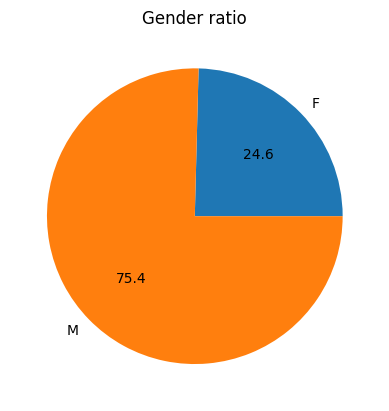

In [22]:
df.groupby("Gender").size().plot(kind = "pie", autopct = "%.1f", title = "Gender ratio")

<Axes: xlabel='Gender'>

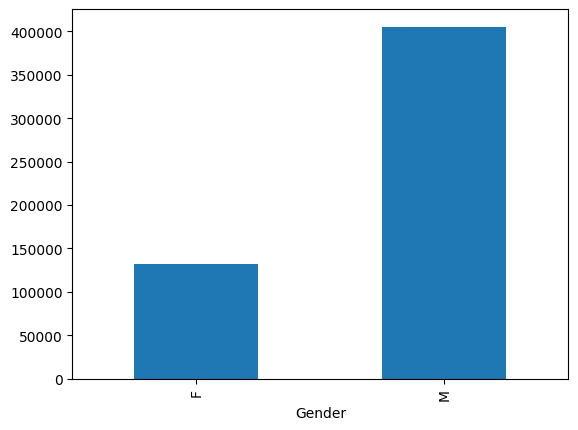

In [23]:
df.groupby("Gender").size().plot(kind = "bar")

<Axes: ylabel='Purchase'>

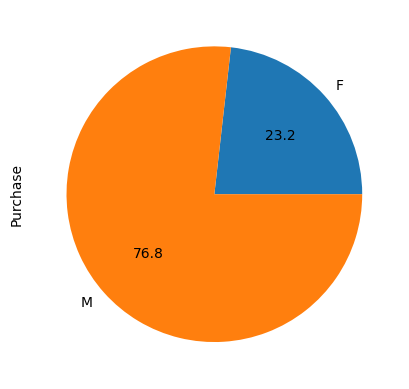

In [24]:
df.groupby("Gender")['Purchase'].sum().plot(kind = "pie", autopct = "%.1f")

<Axes: ylabel='Purchase'>

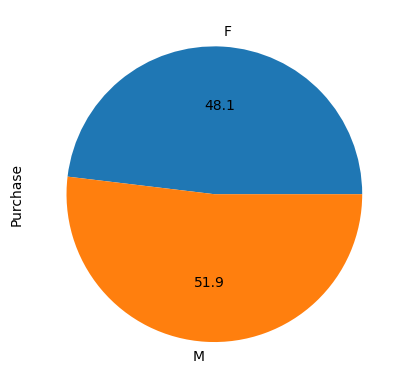

In [25]:
df.groupby("Gender")['Purchase'].mean().plot(kind = "pie", autopct = "%.1f")

# Analyzing the Age and Martial status column

In [26]:
df.groupby("Age").size()

Age
0-17      14707
18-25     97634
26-35    214690
36-45    107499
46-50     44526
51-55     37618
55+       20903
dtype: int64

<Axes: xlabel='Age'>

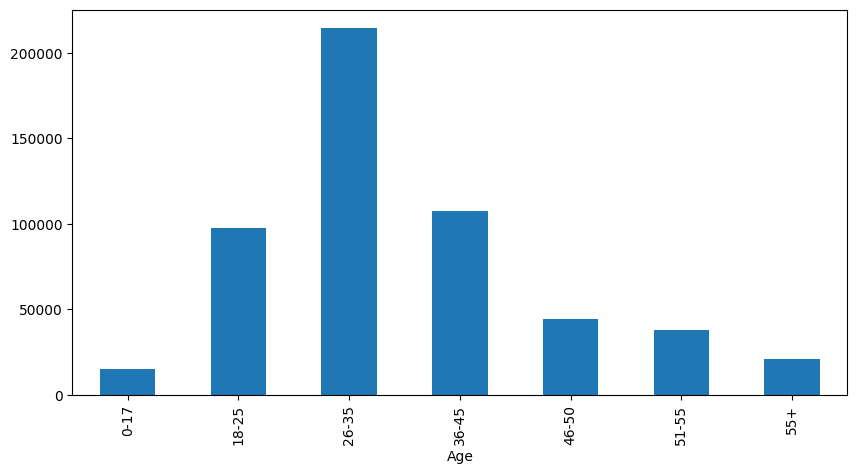

In [27]:
df.groupby("Age").size().plot(kind = "bar", figsize = (10,5))

In [28]:
df_age_product = df.groupby("Age")['Product_ID'].nunique().reset_index()
df_age_product

,Age,Product_ID
0,0-17,2300
1,18-25,3213
2,26-35,3419
3,36-45,3318
4,46-50,3099
5,51-55,2877
6,55+,2573


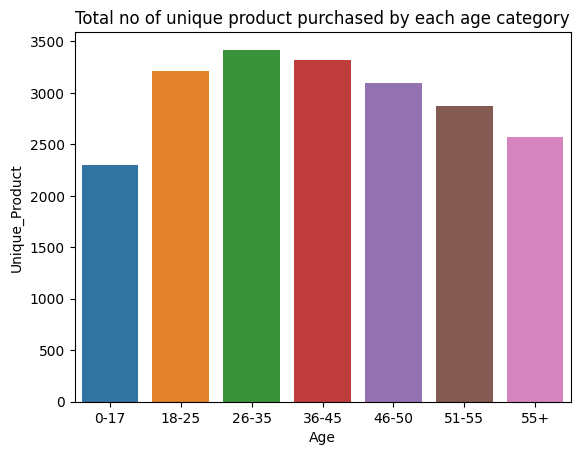

In [29]:
df_age_product = df_age_product.rename(columns = {"Product_ID" : "Unique_Product"})
sns.barplot(data = df_age_product, x = "Age", y = "Unique_Product", hue = "Age")
plt.title("Total no of unique product purchased by each age category")
plt.show()

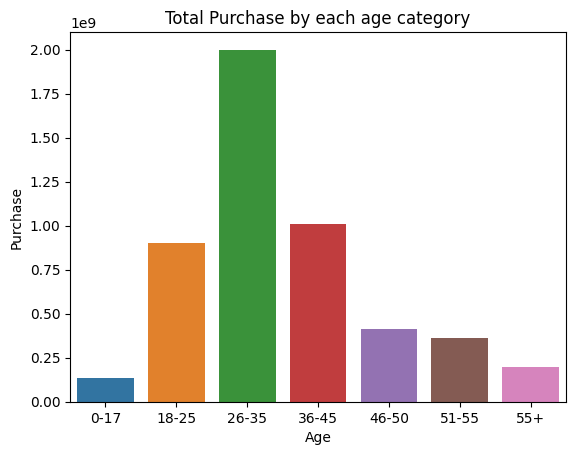

In [30]:
df_age_purchase = df.groupby("Age")['Purchase'].sum().reset_index()
sns.barplot(data = df_age_purchase, x = "Age", y = "Purchase", hue = "Age")
plt.title("Total Purchase by each age category")
plt.show()

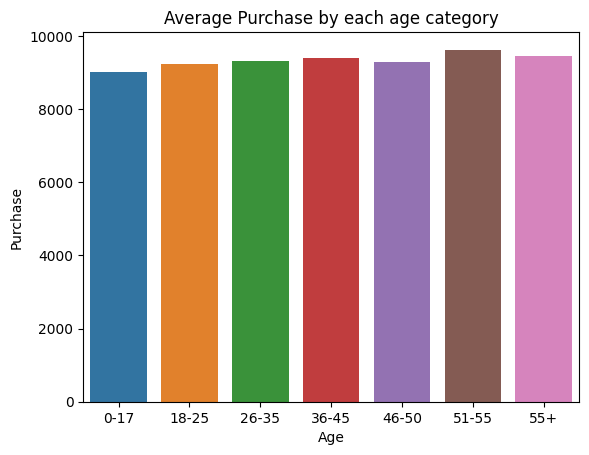

In [31]:
df_age_mean_purchase = df.groupby("Age")['Purchase'].mean().reset_index()
sns.barplot(data = df_age_mean_purchase, x = "Age", y = "Purchase", hue = "Age")
plt.title("Average Purchase by each age category")
plt.show()

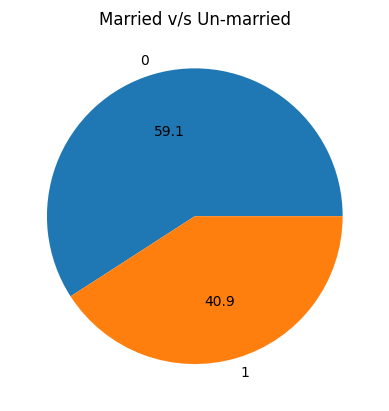

In [32]:
df.groupby("Marital_Status").size().plot(kind = "pie", autopct = "%.1f")
plt.title("Married v/s Un-married")
plt.show()

# Multi-Columns Analysis

<Axes: xlabel='Age', ylabel='count'>

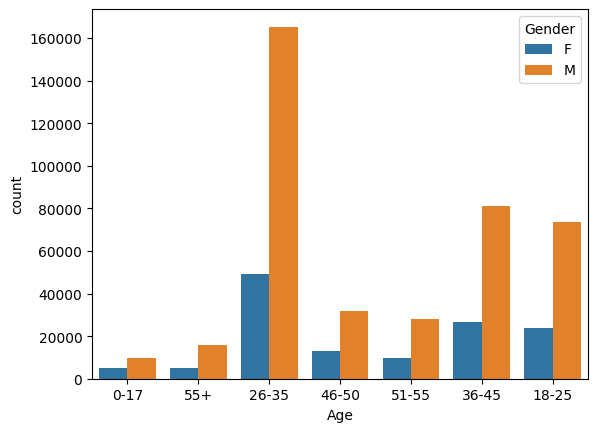

In [33]:
sns.countplot(data = df, x = "Age", hue = "Gender")

<Axes: xlabel='Age', ylabel='count'>

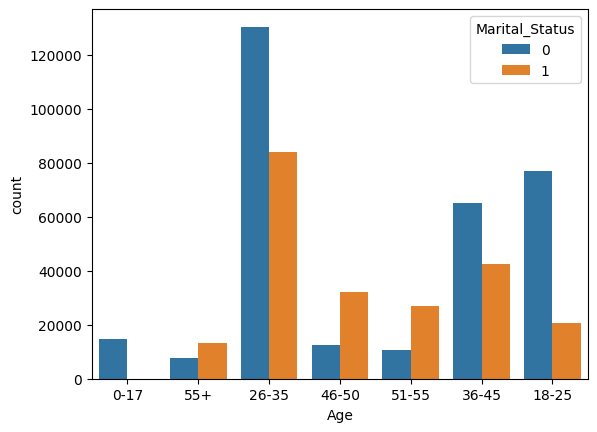

In [34]:
sns.countplot(data = df, x = "Age", hue = "Marital_Status")

<Axes: xlabel='Gender', ylabel='count'>

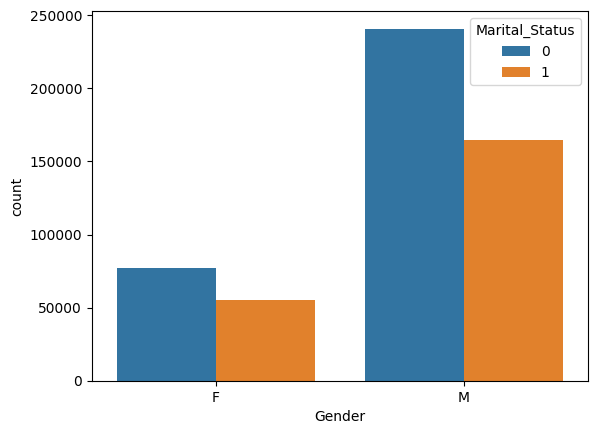

In [35]:
sns.countplot(data = df, x = "Gender", hue = "Marital_Status")

<Axes: xlabel='City_Category', ylabel='count'>

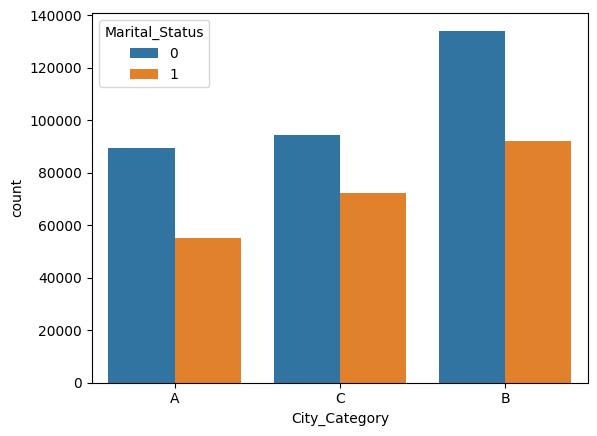

In [36]:
sns.countplot(data = df, x = "City_Category", hue = "Marital_Status")

<Axes: xlabel='City_Category', ylabel='count'>

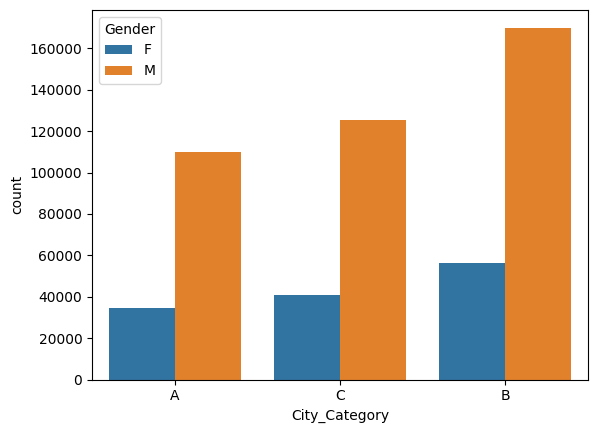

In [37]:
sns.countplot(data = df, x = "City_Category", hue = "Gender")

<Axes: xlabel='City_Category', ylabel='count'>

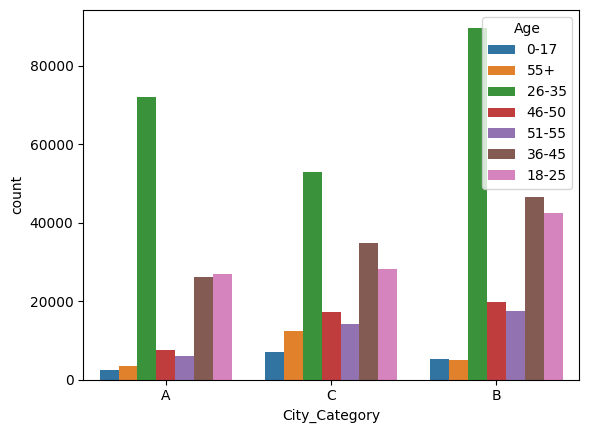

In [38]:
sns.countplot(data = df, x = "City_Category", hue = "Age")

<Axes: xlabel='City_Category', ylabel='count'>

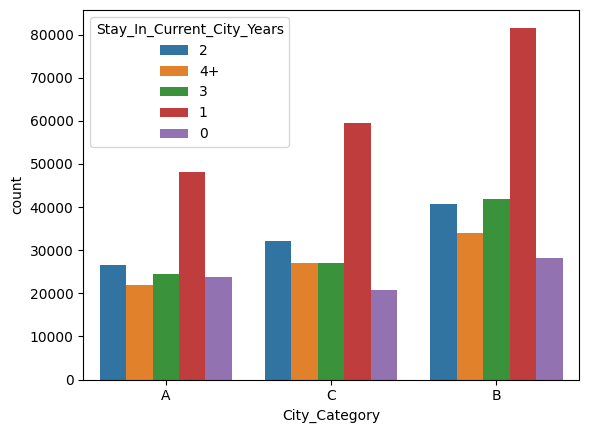

In [39]:
sns.countplot(data = df, x = "City_Category", hue = "Stay_In_Current_City_Years")

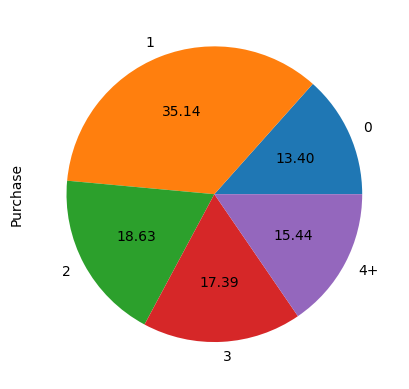

In [40]:
df.groupby('Stay_In_Current_City_Years')['Purchase'].sum().plot(kind = "pie", autopct = "%.2f")
plt.show()

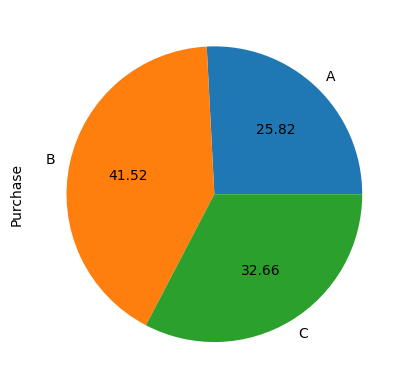

In [41]:
df.groupby('City_Category')['Purchase'].sum().plot(kind = "pie", autopct = "%.2f")
plt.show()

<Axes: xlabel='Occupation'>

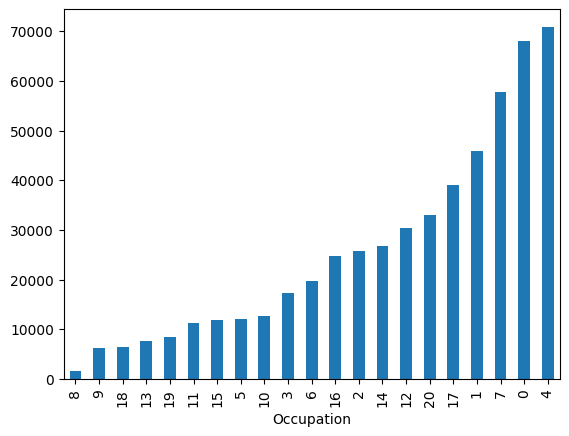

In [52]:
df.groupby('Occupation').size().sort_values().plot(kind = "bar")

<Axes: xlabel='Occupation'>

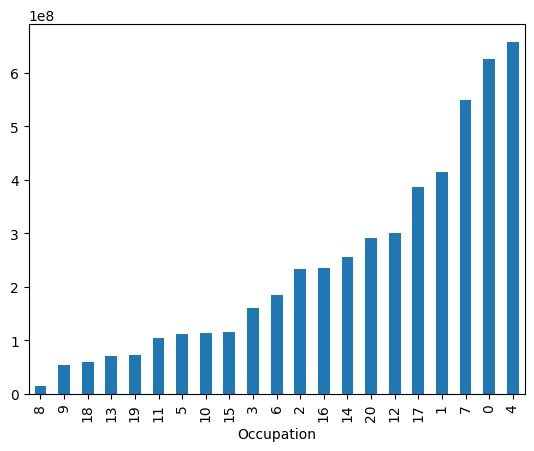

In [53]:
df.groupby('Occupation')['Purchase'].sum().sort_values().plot(kind = "bar")

<Axes: xlabel='Occupation'>

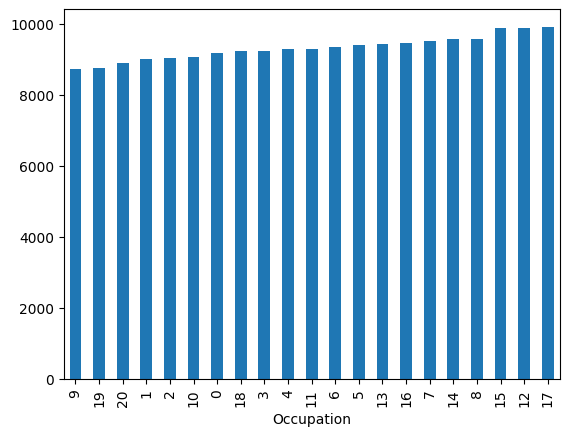

In [54]:
df.groupby('Occupation')['Purchase'].mean().sort_values().plot(kind = "bar")

<Axes: xlabel='Occupation', ylabel='count'>

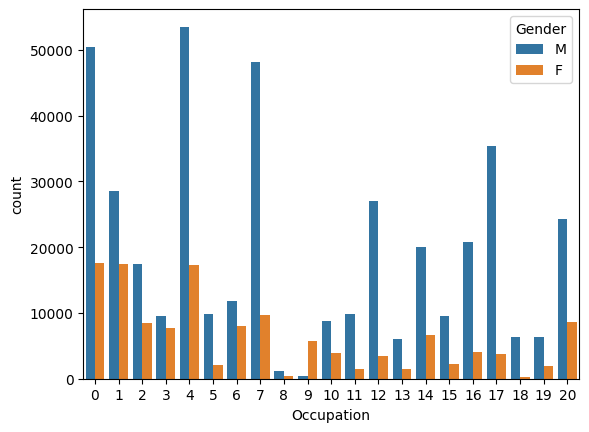

In [44]:
sns.countplot(data = df, x = 'Occupation', hue = "Gender")

<Axes: xlabel='Occupation', ylabel='count'>

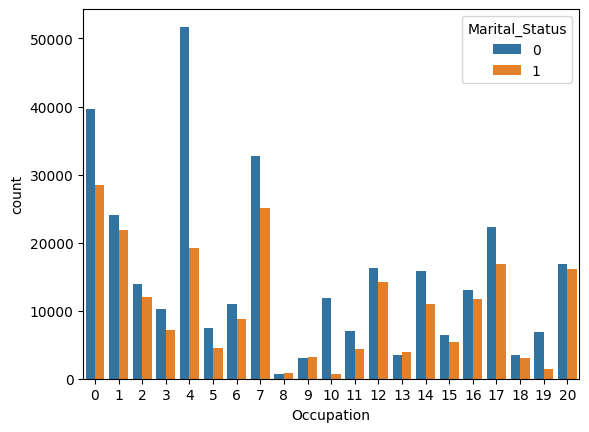

In [56]:
sns.countplot(data = df, x = 'Occupation', hue = "Marital_Status")

<Axes: xlabel='Occupation', ylabel='count'>

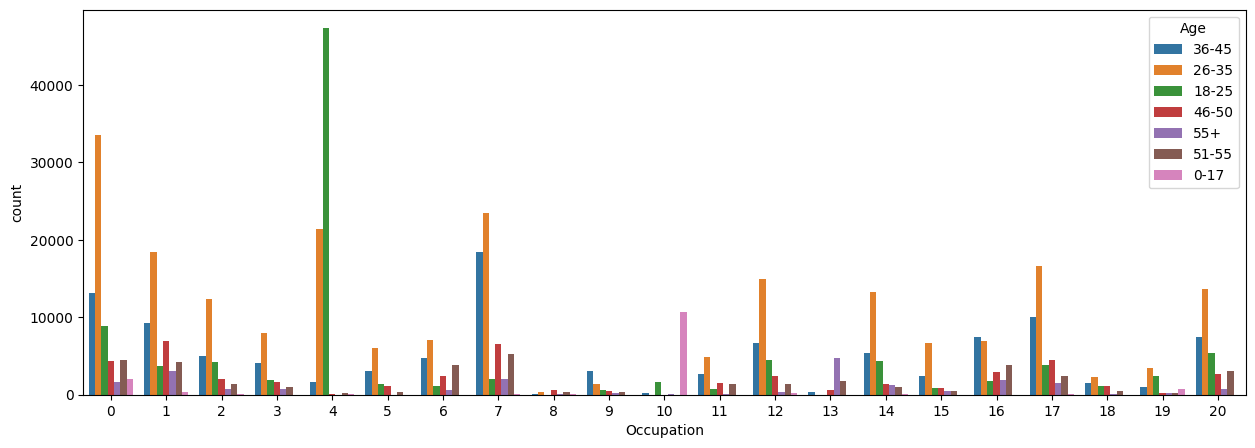

In [62]:
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'Occupation', hue = "Age")

<Axes: xlabel='Occupation'>

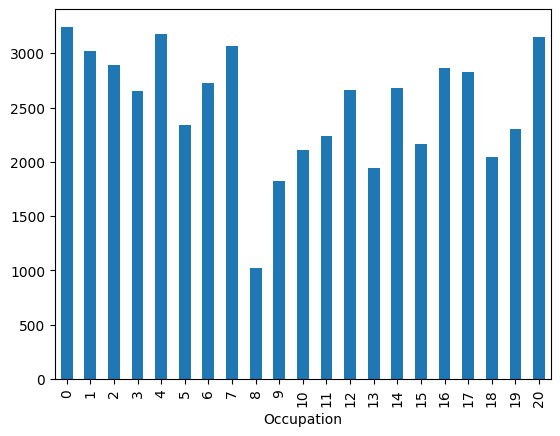

In [63]:
df.groupby("Occupation")["Product_ID"].nunique().plot(kind = "bar")

<Axes: xlabel='Product_Category_1'>

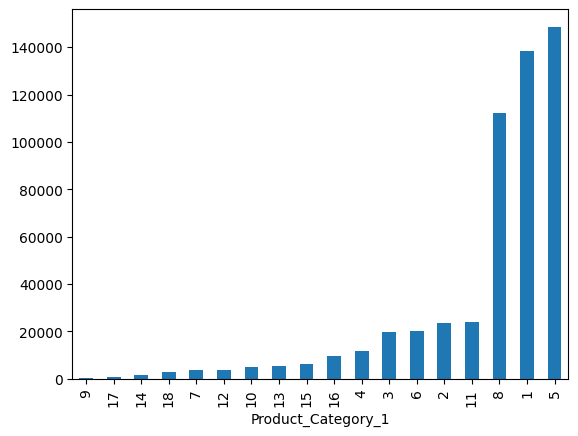

In [82]:
df.groupby("Product_Category_1").size().sort_values().plot(kind = "bar")

<Axes: xlabel='Product_Category_1'>

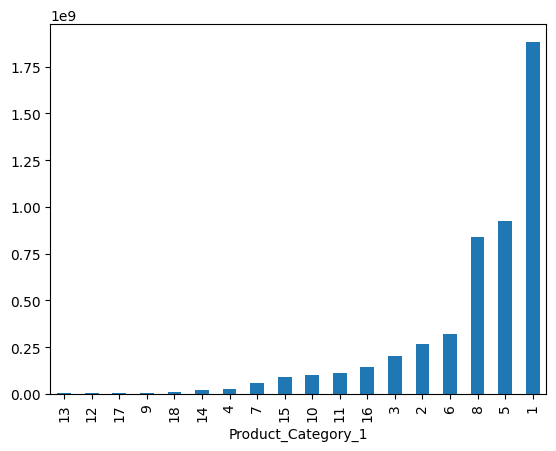

In [79]:
df.groupby("Product_Category_1")['Purchase'].sum().sort_values().plot(kind = "bar")

<Axes: xlabel='Product_Category_1'>

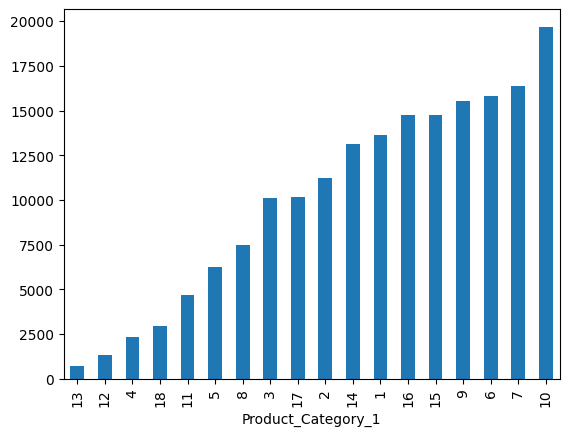

In [78]:
df.groupby("Product_Category_1")['Purchase'].mean().sort_values().plot(kind = "bar")

<Axes: xlabel='Product_ID'>

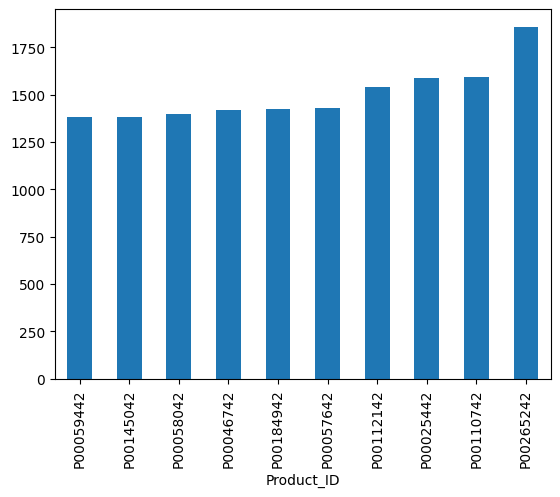

In [92]:
df.groupby("Product_ID").size().nlargest(10).sort_values().plot(kind = "bar")

<Axes: xlabel='Product_ID'>

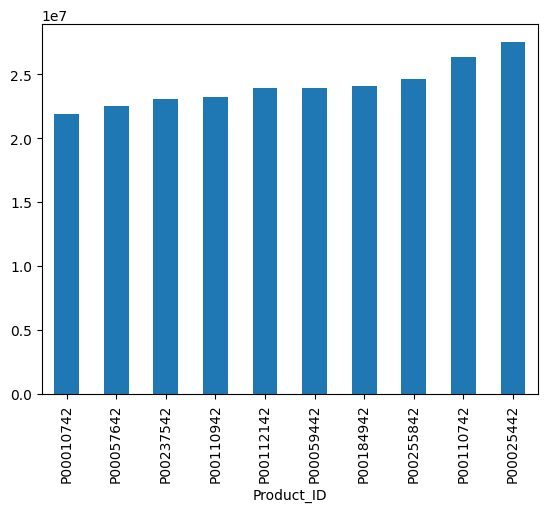

In [97]:
df.groupby("Product_ID")["Purchase"].sum().nlargest(10).sort_values().plot(kind = "bar")

<Axes: xlabel='Product_ID'>

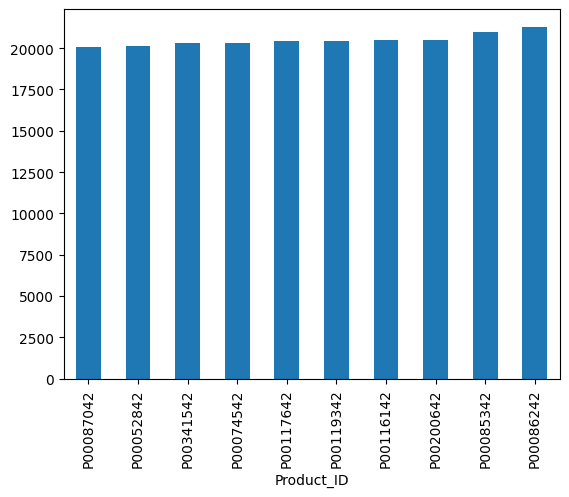

In [94]:
df.groupby("Product_ID")["Purchase"].mean().nlargest(10).sort_values().plot(kind = "bar")

In [114]:
l = []
for i in range(len(df)):
    l.append(df["Gender"][i] + "_" + str(df["Marital_Status"][i]))

df["Marital_Gender"] = l

<Axes: xlabel='Marital_Gender', ylabel='count'>

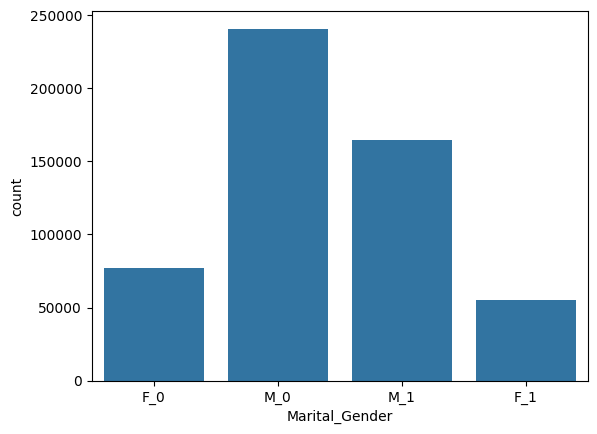

In [117]:
sns.countplot(data = df, x = "Marital_Gender")

<Axes: xlabel='Marital_Gender', ylabel='count'>

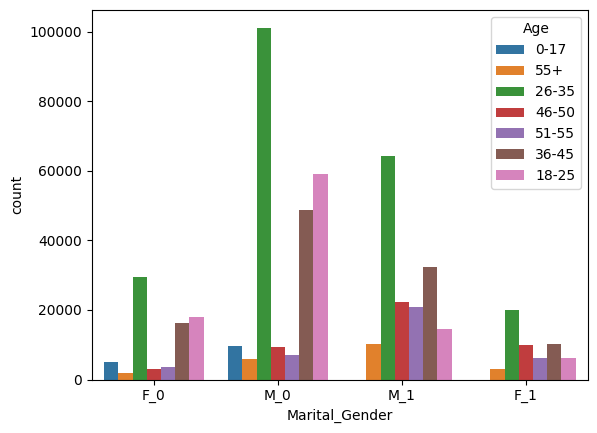

In [118]:
sns.countplot(data = df, x = "Marital_Gender", hue = "Age")

<Axes: xlabel='Age', ylabel='count'>

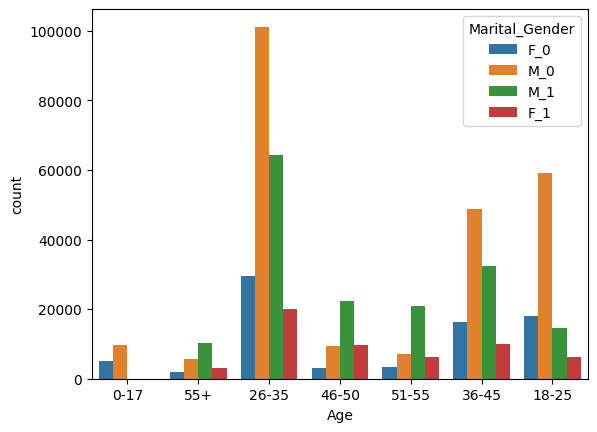

In [119]:
sns.countplot(data = df, x = "Age", hue = "Marital_Gender")